In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data=pd.read_csv('gld_price_data.csv')

In [70]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [71]:
data.shape

(2290, 6)

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [73]:
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [74]:
data.duplicated().sum()

0

In [75]:
data.rename(columns={'EUR/USD': 'EUR_USD'}, inplace=True)

In [76]:
data1=data.copy()
data1=data1.drop('Date',axis=1)
colll = data.select_dtypes(exclude='object')

for col in data1:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    count_outlier = ((data[col] > upper) | (data[col] < lower)).sum()
    total = data1.shape[0]
    percentage = int(count_outlier * 100 / total)
    print(f'Outliers in column {col} is: {percentage}%')

Outliers in column SPX is: 0%
Outliers in column GLD is: 5%
Outliers in column USO is: 5%
Outliers in column SLV is: 5%
Outliers in column EUR_USD is: 0%


In [77]:
#correlaction
correlation=data1.corr()

<Axes: >

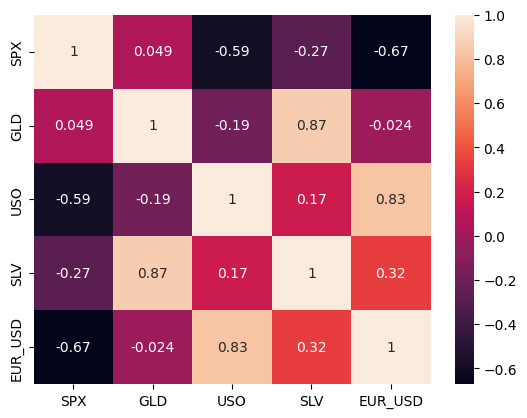

In [78]:
sns.heatmap(correlation,annot=True)

In [79]:
skewness = data1.skew()
print(skewness)

SPX        0.300362
GLD        0.334138
USO        1.699331
SLV        1.153641
EUR_USD   -0.005292
dtype: float64


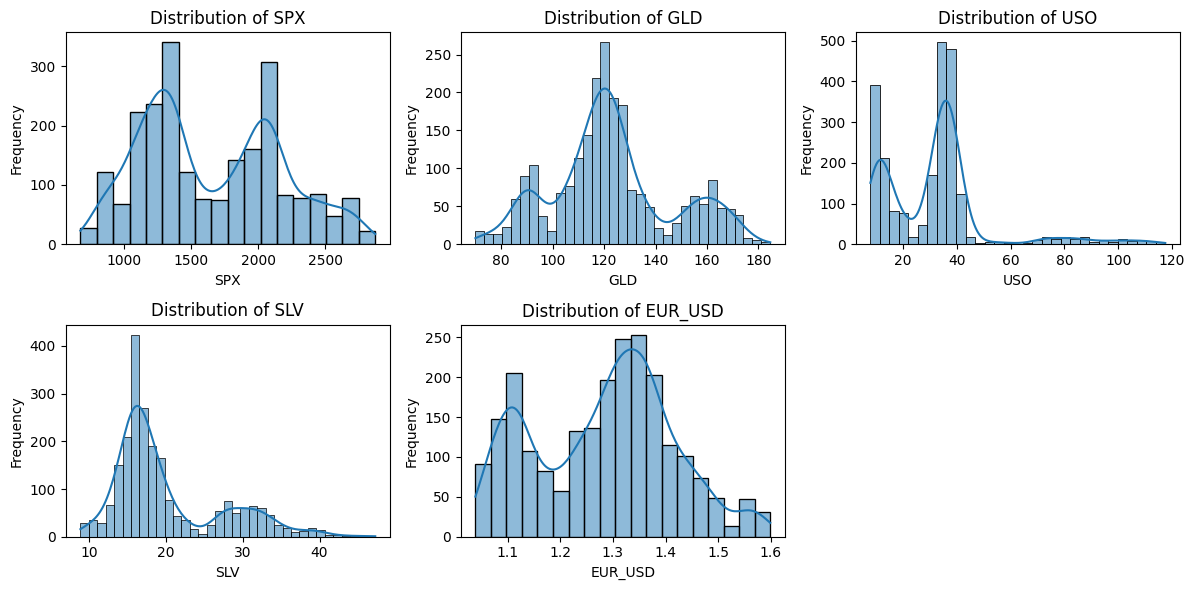

In [80]:
plt.figure(figsize=(12, 6))

# Create a subplot for each column
for i, col in enumerate(data1.columns):
    plt.subplot(2, 3, i + 1)  # Adjust the subplot layout as needed
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'data1' is your DataFrame
X = data1.drop('GLD', axis=1)
y = data1['GLD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Create a dictionary to store results
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2': []
}

# List of regression models to compare
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regression', RandomForestRegressor(random_state=42))
]

# Loop through models, train, evaluate, and store results
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                      Model       MAE        MSE      RMSE        R2
0         Linear Regression  5.695901  56.165594  7.494371  0.897564
1  Decision Tree Regression  1.476288   8.372293  2.893491  0.984730
2  Random Forest Regression  1.235614   5.469545  2.338706  0.990025


In [82]:
#app streamlit

best_model=RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
    

In [83]:
import pickle
file_name='Gold.sav'
pickle.dump(best_model,open(file_name,'wb'))